## Import libraries

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np


## Import dataset

In [2]:
df = pd.read_csv("Social.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Feature selection

In [3]:
df= df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## train_test_split

In [4]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Purchased"]),df["Purchased"],test_size=0.3,random_state=3)

## Standard Scaling

In [5]:
scaler = StandardScaler()

In [6]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [7]:
x_test_scaled

array([[ 0.76506273,  0.1251659 ],
       [ 0.85844441, -1.34008676],
       [ 1.97902452, -1.2204743 ],
       [-1.66286085, -0.62241199],
       [-1.00918911,  0.57371263],
       [ 0.20477268,  0.24477836],
       [ 1.23197111, -1.39989299],
       [-1.38271582, -0.65231511],
       [ 0.57829938, -0.92144315],
       [-1.00918911, -1.57931169],
       [ 0.29815435, -0.29347772],
       [ 0.111391  , -0.8317338 ],
       [ 0.76506273,  0.54380952],
       [-0.2621357 , -0.50279953],
       [-1.10257079, -1.13076495],
       [-1.28933414, -1.51950546],
       [-0.72904409, -0.62241199],
       [-1.28933414,  0.42419705],
       [-0.07537235,  2.00906218],
       [ 0.20477268, -0.29347772],
       [-0.54228073,  0.48400328],
       [-0.35551738, -1.34008676],
       [-0.82242576,  0.30458459],
       [ 0.39153603, -0.14396214],
       [-0.44889906,  1.2913874 ],
       [-0.63566241, -0.35328395],
       [ 0.39153603, -0.47289641],
       [ 1.32535279,  2.39780268],
       [ 0.29815435,

## convert them from numpy array to dataframe 

In [8]:
x_train_final=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_final=pd.DataFrame(x_test_scaled,columns=x_test.columns)

## after scaling data mean become 0 and standard deviation become 1 

In [11]:
np.round(x_train.describe(),1)  ## before

,Age,EstimatedSalary
count,280.0,280.0
mean,37.8,69814.3
std,10.7,33501.2
min,18.0,15000.0
25%,29.8,44000.0
50%,37.0,70000.0
75%,46.0,88000.0
max,60.0,150000.0


In [12]:
np.round(x_train_final.describe(),1) ## after

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.8,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


## see the diff before scaling after scaling

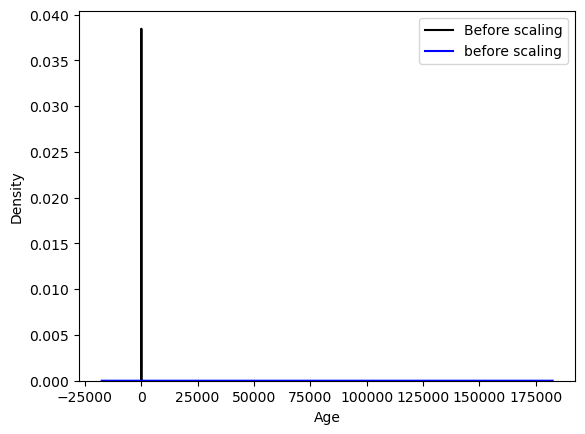

In [9]:

sns.kdeplot(x=x_train["Age"], color="black", label="Before scaling")
sns.kdeplot(x=x_train["EstimatedSalary"], color="blue", label="before scaling")
plt.legend()
plt.show()



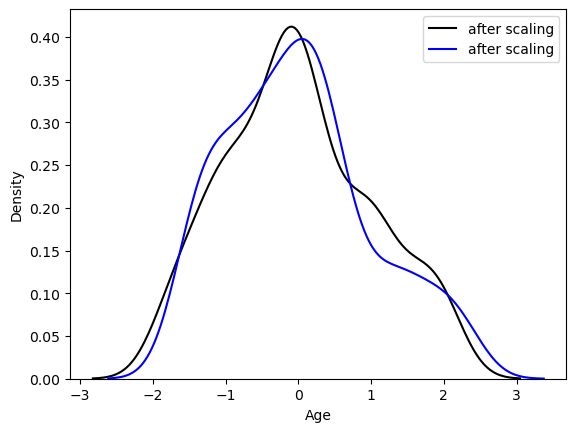

In [38]:
sns.kdeplot(x=x_train_final["Age"], color="black", label="after scaling")
sns.kdeplot(x=x_train_final["EstimatedSalary"], color="blue", label="after scaling")
plt.legend()


plt.show()

## Train the model without scaling

In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred1 = lr.predict(x_test)

In [44]:
print("Accuracy Score :",accuracy_score(y_test,y_pred1)*100)

Accuracy Score : 81.66666666666667


In [45]:
lr2 = LogisticRegression()

In [46]:
lr2.fit(x_train_final,y_train)

LogisticRegression()

In [47]:
y_pred2 = lr2.predict(x_test_final)

In [48]:
print("Accuracy Score :",accuracy_score(y_test,y_pred2)*100)

Accuracy Score : 83.33333333333334


## so we can see that before scaling the accuracy is 81 but after scaling the accuracy become 83 